# Biomarker search
Predictors of neurofeedback success?

In [2]:
import os
import pandas as pd
import src.my_settings as settings

sett = settings.settings()

In [3]:
# Read participants.tsv
df_p = pd.read_csv(os.path.join(sett["git_path"], "data", "participants.tsv"), sep="\t")

# remove sub-07 and sub-17
df_p = df_p[~df_p["participant_id"].isin(["sub-07", "sub-17"])]

df_p

,participant_id,age,sex,mini_proms,MIQ3_Internal,MIQ3_External,MIQ3_CInes,Handedness_LI,Augmented_LI
0,sub-01,31,F,13.5,5.50,5.75,5.75,90.0,93.33
1,sub-02,24,F,19.5,6.25,6.50,6.75,95.0,93.33
2,sub-03,38,M,29.5,6.75,6.50,7.00,70.0,56.67
3,sub-04,38,F,16.5,7.00,7.00,6.75,85.0,83.33
4,sub-05,26,F,31.5,6.00,5.50,5.75,90.0,90.00
5,sub-06,36,M,24.0,6.00,4.25,6.00,90.0,86.67
7,sub-08,24,F,27.5,6.75,6.00,4.25,70.0,76.77
8,sub-09,29,M,18.0,6.75,7.00,6.50,75.0,83.33
9,sub-10,36,F,16.5,4.50,6.00,4.00,100.0,93.33
10,sub-11,42,F,18.5,6.00,6.00,4.00,100.0,100.00


In [4]:
# load average correlation values
df = pd.read_pickle(os.path.join(sett["git_path"], "data", "RealTimeTBVOutputs.pkl"))

# remove sub-07 and sub-17
df = df[~df["sub"].isin(["sub-07", "sub-17"])]

df_persubject = df.groupby(["sub", "feedback"]).mean()
df_active = df_persubject.loc[(slice(None), "active"), :].copy()
df_active

,,correlation_tc,correlation_mean,correlation_mean_first_half,correlation_mean_second_half
sub,feedback,,,,
sub-01,active,"[[0.9491462326419966], [0.8728542440724366], [...",0.962485,1.005248,0.924473
sub-02,active,"[[0.6870329471695454], [0.6233786121717074], [...",1.298010,1.510473,1.109154
sub-03,active,"[[0.4103036783045442], [0.4326364126356264], [...",0.744021,0.875293,0.627333
sub-04,active,"[[0.8351683966135046], [0.6757506595653463], [...",0.890845,0.900014,0.882695
sub-05,active,"[[0.7836925509370624], [0.7106594733271855], [...",1.213030,1.162585,1.257869
sub-06,active,"[[1.0921025072491999], [1.044105963737873], [1...",1.081990,1.152273,1.019516
sub-08,active,"[[0.895138502305214], [0.837598857737674], [0....",0.992871,1.306857,0.713773
sub-09,active,"[[1.2053618416131795], [1.1686134852018455], [...",1.163370,1.406240,0.947485
sub-10,active,"[[1.1164255663394613], [1.136263579707882], [0...",1.280417,1.557883,1.033780


In [5]:
# join df_active with df_p in a new dataframe
df_joined = pd.merge(df_active, df_p, left_on="sub", right_on="participant_id")
df_joined

,correlation_tc,correlation_mean,correlation_mean_first_half,correlation_mean_second_half,participant_id,age,sex,mini_proms,MIQ3_Internal,MIQ3_External,MIQ3_CInes,Handedness_LI,Augmented_LI
0,"[[0.9491462326419966], [0.8728542440724366], [...",0.962485,1.005248,0.924473,sub-01,31,F,13.5,5.50,5.75,5.75,90.0,93.33
1,"[[0.6870329471695454], [0.6233786121717074], [...",1.298010,1.510473,1.109154,sub-02,24,F,19.5,6.25,6.50,6.75,95.0,93.33
2,"[[0.4103036783045442], [0.4326364126356264], [...",0.744021,0.875293,0.627333,sub-03,38,M,29.5,6.75,6.50,7.00,70.0,56.67
3,"[[0.8351683966135046], [0.6757506595653463], [...",0.890845,0.900014,0.882695,sub-04,38,F,16.5,7.00,7.00,6.75,85.0,83.33
4,"[[0.7836925509370624], [0.7106594733271855], [...",1.213030,1.162585,1.257869,sub-05,26,F,31.5,6.00,5.50,5.75,90.0,90.00
5,"[[1.0921025072491999], [1.044105963737873], [1...",1.081990,1.152273,1.019516,sub-06,36,M,24.0,6.00,4.25,6.00,90.0,86.67
6,"[[0.895138502305214], [0.837598857737674], [0....",0.992871,1.306857,0.713773,sub-08,24,F,27.5,6.75,6.00,4.25,70.0,76.77
7,"[[1.2053618416131795], [1.1686134852018455], [...",1.163370,1.406240,0.947485,sub-09,29,M,18.0,6.75,7.00,6.50,75.0,83.33
8,"[[1.1164255663394613], [1.136263579707882], [0...",1.280417,1.557883,1.033780,sub-10,36,F,16.5,4.50,6.00,4.00,100.0,93.33
9,"[[1.026148204178893], [1.0018510003086332], [0...",1.166489,1.289412,1.057224,sub-11,42,F,18.5,6.00,6.00,4.00,100.0,100.00


## MI-Q3 and average correlation during active NF

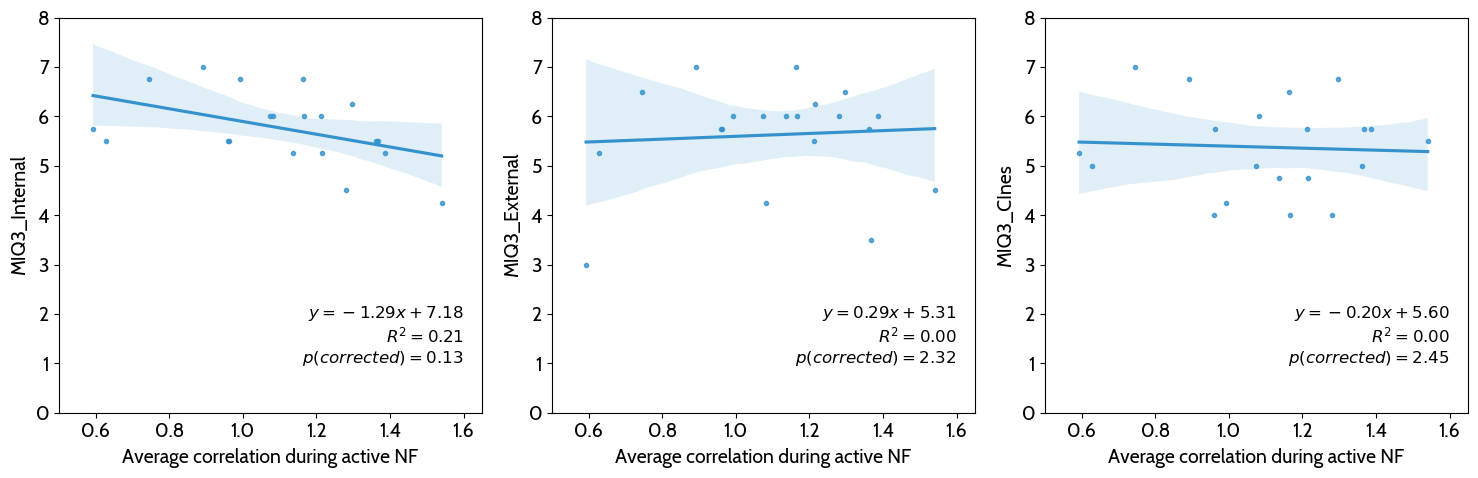

In [8]:
# let's build a figure with 3 subplots (1 row, 3 columns) with:
# subplot 1 - linear regression between correlation_mean and MIQ3_Internal
# subplot 2 - linear regression between correlation_mean and MIQ3_External
# subplot 3 - linear regression between correlation_mean and MIQ3_CInes

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, miq in enumerate(["MIQ3_Internal", "MIQ3_External", "MIQ3_CInes"]):
    sns.regplot(
        data=df_joined,
        x="correlation_mean",
        y=miq,
        ax=axs[i],
        marker=".",
        color="#3392CC",
    )
    # axs[i].set_title(f"Correlation between correlation_mean and {miq}")
    axs[i].set_xlabel("Average correlation during active NF")
    axs[i].set_ylabel(miq)
    axs[i].set_ylim(0, 8)
    axs[i].set_xlim(0.5, 1.65)
    slope, intercept, r_value, p_value, std_err = linregress(
        df_joined["correlation_mean"], df_joined[miq]
    )

    # correct for multiple comparisons
    p_value = p_value * 3

    axs[i].text(
        1.6,
        1,
        f"$y={slope:.2f}x + {intercept:.2f}$\n$R^2={r_value**2:.2f}$\n$p (corrected)={p_value:.2f}$",
        fontsize=12,
        ha="right",
    )

plt.tight_layout()
plt.show()

## Mini-PROMS and average correlation

Text(1.6, 30, '$y=-2.75x + 22.19$\n$R^2=0.01$\n$p=0.61$')

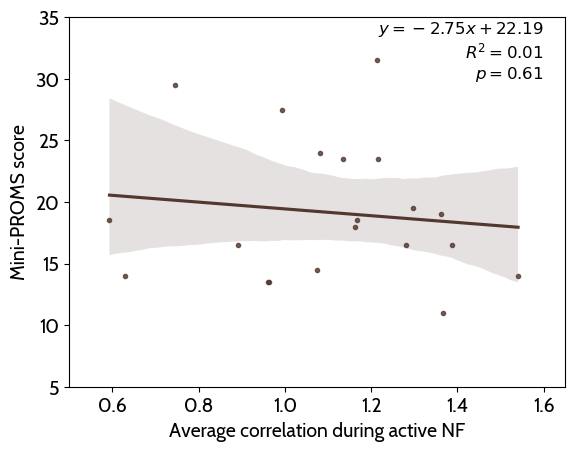

In [9]:
# regression plot between correlation_mean and mini_proms

sns.regplot(
    data=df_joined,
    x="correlation_mean",
    y="mini_proms",
    marker=".",
    color="#533830",
)
plt.xlabel("Average correlation during active NF")
plt.ylabel("Mini-PROMS score")
plt.ylim(5, 35)
plt.xlim(0.5, 1.65)
slope, intercept, r_value, p_value, std_err = linregress(
    df_joined["correlation_mean"], df_joined["mini_proms"]
)
plt.text(
    1.6,
    30,
    f"$y={slope:.2f}x + {intercept:.2f}$\n$R^2={r_value**2:.2f}$\n$p={p_value:.2f}$",
    fontsize=12,
    ha="right",
)

# POMS and average correlation

In [10]:
# load data
df_poms = pd.read_csv(
    os.path.join(sett["git_path"], "data", "POMS_paired_scores.tsv"), sep="\t"
)
df_poms

,Sujeito,Tempo,S_Tension,S_Depression,S_Hostility,S_Fatigue,S_Confusion,S_Vigor,S_Total
0,1,Antes,5.0,0,3.0,8,4.0,13,107.0
1,1,Depois,2.0,1,2.0,12,3.0,15,105.0
2,2,Antes,1.0,0,2.0,1,4.0,11,97.0
3,2,Depois,0.0,0,0.0,7,2.0,14,95.0
4,3,Antes,5.0,1,2.0,9,5.0,13,109.0
5,3,Depois,0.0,0,1.0,8,6.0,15,100.0
6,4,Antes,0.0,0,0.0,0,2.0,16,86.0
7,4,Depois,0.0,0,0.0,1,2.0,15,88.0
8,5,Antes,2.0,2,1.0,6,3.0,8,106.0
9,5,Depois,1.0,0,1.0,4,2.0,7,101.0


In [24]:
# differences in S_Total between "Depois" and "Antes"
df_poms_diff = df_poms.loc[df_poms["Tempo"] == "Depois"].copy()

# remove "Tempo" column
df_poms_diff.drop(columns=["Tempo"], inplace=True)

# rename values in "Sujeito" to 'sub-XX' format
df_poms_diff["Sujeito"] = df_poms_diff["Sujeito"].apply(lambda x: f"sub-{x:02d}")

# change the values of the columns to the difference betweeen "depois" and "antes"
df_poms_diff["S_Tension"] = (
    df_poms.loc[df_poms["Tempo"] == "Depois", "S_Tension"].values
    - df_poms.loc[df_poms["Tempo"] == "Antes", "S_Tension"].values
)
df_poms_diff["S_Depression"] = (
    df_poms.loc[df_poms["Tempo"] == "Depois", "S_Depression"].values
    - df_poms.loc[df_poms["Tempo"] == "Antes", "S_Depression"].values
)
df_poms_diff["S_Hostility"] = (
    df_poms.loc[df_poms["Tempo"] == "Depois", "S_Hostility"].values
    - df_poms.loc[df_poms["Tempo"] == "Antes", "S_Hostility"].values
)
df_poms_diff["S_Fatigue"] = (
    df_poms.loc[df_poms["Tempo"] == "Depois", "S_Fatigue"].values
    - df_poms.loc[df_poms["Tempo"] == "Antes", "S_Fatigue"].values
)
df_poms_diff["S_Confusion"] = (
    df_poms.loc[df_poms["Tempo"] == "Depois", "S_Confusion"].values
    - df_poms.loc[df_poms["Tempo"] == "Antes", "S_Confusion"].values
)
df_poms_diff["S_Vigor"] = (
    df_poms.loc[df_poms["Tempo"] == "Depois", "S_Vigor"].values
    - df_poms.loc[df_poms["Tempo"] == "Antes", "S_Vigor"].values
)
df_poms_diff["S_Total"] = (
    df_poms.loc[df_poms["Tempo"] == "Depois", "S_Total"].values
    - df_poms.loc[df_poms["Tempo"] == "Antes", "S_Total"].values
)
df_poms_diff


,Sujeito,S_Tension,S_Depression,S_Hostility,S_Fatigue,S_Confusion,S_Vigor,S_Total
1,sub-01,-3.0,1,-1.0,4,-1.0,2,-2.0
3,sub-02,-1.0,0,-2.0,6,-2.0,3,-2.0
5,sub-03,-5.0,-1,-1.0,-1,1.0,2,-9.0
7,sub-04,0.0,0,0.0,1,0.0,-1,2.0
9,sub-05,-1.0,-2,0.0,-2,-1.0,-1,-5.0
11,sub-06,0.0,0,2.0,-2,-1.0,-1,0.0
13,sub-07,-1.0,-3,-2.0,-1,1.0,0,-6.0
15,sub-08,-6.0,-2,0.0,0,0.0,1,-9.0
17,sub-09,0.0,0,-1.0,4,0.0,2,1.0
19,sub-10,1.0,0,0.0,0,0.0,2,-1.0


In [26]:
# join the dataframes df_poms_diff["S_Total"]
df_joined_poms = pd.merge(
    df_joined, df_poms_diff, left_on="participant_id", right_on="Sujeito"
)

df_joined_poms

,correlation_tc,correlation_mean,correlation_mean_first_half,correlation_mean_second_half,participant_id,age,sex,mini_proms,MIQ3_Internal,MIQ3_External,MIQ3_CInes,Handedness_LI,Augmented_LI,Sujeito,S_Tension,S_Depression,S_Hostility,S_Fatigue,S_Confusion,S_Vigor,S_Total
0,"[[0.9491462326419966], [0.8728542440724366], [...",0.962485,1.005248,0.924473,sub-01,31,F,13.5,5.50,5.75,5.75,90.0,93.33,sub-01,-3.0,1,-1.0,4,-1.0,2,-2.0
1,"[[0.6870329471695454], [0.6233786121717074], [...",1.298010,1.510473,1.109154,sub-02,24,F,19.5,6.25,6.50,6.75,95.0,93.33,sub-02,-1.0,0,-2.0,6,-2.0,3,-2.0
2,"[[0.4103036783045442], [0.4326364126356264], [...",0.744021,0.875293,0.627333,sub-03,38,M,29.5,6.75,6.50,7.00,70.0,56.67,sub-03,-5.0,-1,-1.0,-1,1.0,2,-9.0
3,"[[0.8351683966135046], [0.6757506595653463], [...",0.890845,0.900014,0.882695,sub-04,38,F,16.5,7.00,7.00,6.75,85.0,83.33,sub-04,0.0,0,0.0,1,0.0,-1,2.0
4,"[[0.7836925509370624], [0.7106594733271855], [...",1.213030,1.162585,1.257869,sub-05,26,F,31.5,6.00,5.50,5.75,90.0,90.00,sub-05,-1.0,-2,0.0,-2,-1.0,-1,-5.0
5,"[[1.0921025072491999], [1.044105963737873], [1...",1.081990,1.152273,1.019516,sub-06,36,M,24.0,6.00,4.25,6.00,90.0,86.67,sub-06,0.0,0,2.0,-2,-1.0,-1,0.0
6,"[[0.895138502305214], [0.837598857737674], [0....",0.992871,1.306857,0.713773,sub-08,24,F,27.5,6.75,6.00,4.25,70.0,76.77,sub-08,-6.0,-2,0.0,0,0.0,1,-9.0
7,"[[1.2053618416131795], [1.1686134852018455], [...",1.163370,1.406240,0.947485,sub-09,29,M,18.0,6.75,7.00,6.50,75.0,83.33,sub-09,0.0,0,-1.0,4,0.0,2,1.0
8,"[[1.1164255663394613], [1.136263579707882], [0...",1.280417,1.557883,1.033780,sub-10,36,F,16.5,4.50,6.00,4.00,100.0,93.33,sub-10,1.0,0,0.0,0,0.0,2,-1.0
9,"[[1.026148204178893], [1.0018510003086332], [0...",1.166489,1.289412,1.057224,sub-11,42,F,18.5,6.00,6.00,4.00,100.0,100.00,sub-11,-1.0,-1,0.0,2,-2.0,0,-2.0


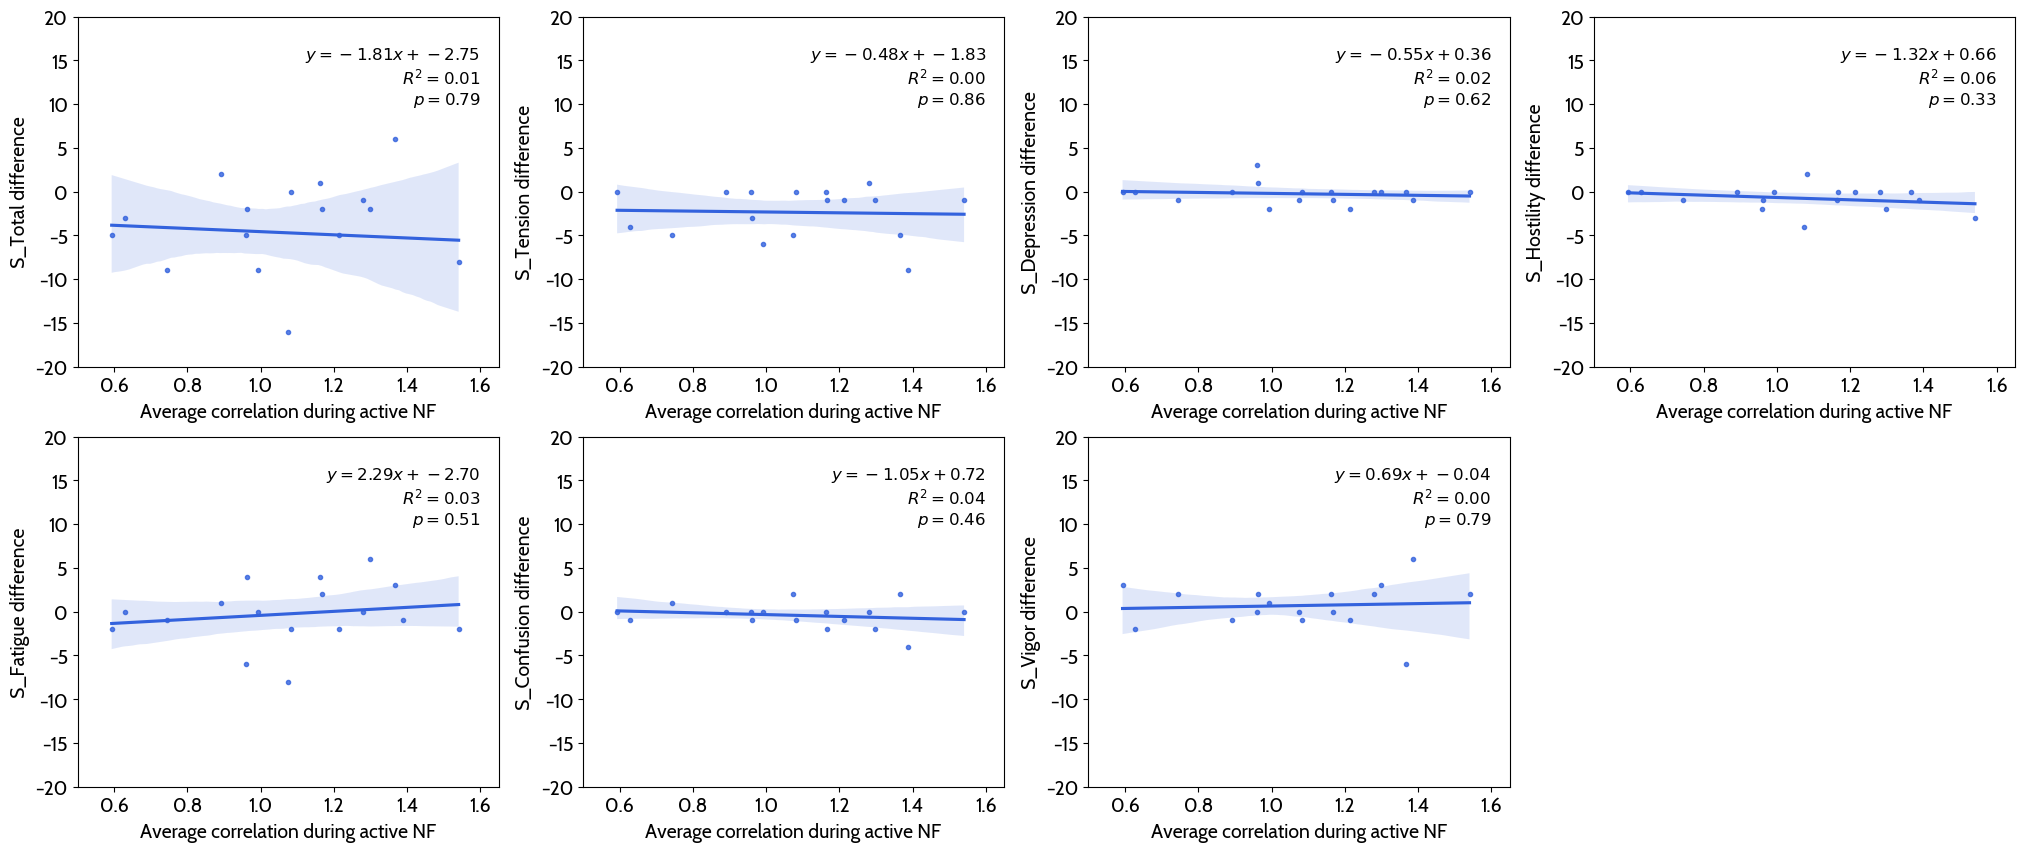

In [39]:
# in a subplot, draw regresion lines between correlation_mean and S_Total, S_Tension, S_Depression, S_Hostility, S_Fatigue, S_Confusion, S_Vigor
fig, axs = plt.subplots(2, 4, figsize=(25, 10))

for i, poms in enumerate(
    [
        "S_Total",
        "S_Tension",
        "S_Depression",
        "S_Hostility",
        "S_Fatigue",
        "S_Confusion",
        "S_Vigor",
    ]
):
    sns.regplot(
        data=df_joined_poms,
        x="correlation_mean",
        y=poms,
        ax=axs[i // 4, i % 4],
        marker=".",
        color="#3362DD",
    )
    axs[i // 4, i % 4].set_xlabel("Average correlation during active NF")
    axs[i // 4, i % 4].set_ylabel(f"{poms} difference")
    axs[i // 4, i % 4].set_ylim(-20, 20)
    axs[i // 4, i % 4].set_xlim(0.5, 1.65)
    slope, intercept, r_value, p_value, std_err = linregress(
        df_joined_poms["correlation_mean"], df_joined_poms[poms]
    )
    axs[i // 4, i % 4].text(
        1.6,
        10,
        f"$y={slope:.2f}x + {intercept:.2f}$\n$R^2={r_value**2:.2f}$\n$p={p_value:.2f}$",
        fontsize=12,
        ha="right",
    )

    # delete last axis
    if i == 6:
        axs[1, 3].axis("off")